# lec 5

In [3]:
my_name = 'bob'

print(f"my name is {my_name}")

my name is bob


In [4]:
import boto3
from botocore.exceptions import ClientError
import json

def get_secret(secret_name):
    region_name = "us-east-1"

    # Create a Secrets Manager client
    session = boto3.session.Session()
    client = session.client(
        service_name='secretsmanager',
        region_name=region_name
    )

    try:
        get_secret_value_response = client.get_secret_value(
            SecretId=secret_name
        )
    except ClientError as e:
        raise e

    secret = get_secret_value_response['SecretString']
    
    return json.loads(secret)

In [5]:
import psycopg2

conn = psycopg2.connect(host=get_secret('postgresql')['host'],
                      user=get_secret('postgresql')['username'],
                      password = get_secret('postgresql')['password'],
                      dbname=get_secret('postgresql')['engine'])

cur = conn.cursor()

In [6]:
fips= '100'
state_name= 'fake state'
insert_sql= f"""
            insert into name(fips,name)

            values('{fips}', '{state_name}')

            """
print(insert_sql)


            insert into name(fips,name)

            values('100', 'fake state')

            


In [7]:
cur.execute(insert_sql)

In [8]:
conn.commit()

In [9]:
query_sql= "select * from name"

In [10]:
cur.execute(query_sql)

In [11]:
for row in cur.fetchall():
    print(row)

('01', 'Alabama')
('02', 'Alaska')
('04', 'Arizona')
('05', 'Arkansas')
('06', 'California')
('08', 'Colorado')
('09', 'Connecticut')
('10', 'Delaware')
('12', 'Florida')
('13', 'Georgia')
('15', 'Hawaii')
('16', 'Idaho')
('17', 'Illinois')
('18', 'Indiana')
('19', 'Iowa')
('20', 'Kansas')
('21', 'Kentucky')
('22', 'Louisiana')
('23', 'Maine')
('24', 'Maryland')
('25', 'Massachusetts')
('26', 'Michigan')
('27', 'Minnesota')
('28', 'Mississippi')
('29', 'Missouri')
('30', 'Montana')
('31', 'Nebraska')
('32', 'Nevada')
('33', 'New Hampshire')
('34', 'New Jersey')
('35', 'New Mexico')
('36', 'New York')
('37', 'North Carolina')
('38', 'North Dakota')
('39', 'Ohio')
('40', 'Oklahoma')
('41', 'Oregon')
('42', 'Pennsylvania')
('44', 'Rhode Island')
('45', 'South Carolina')
('46', 'South Dakota')
('47', 'Tennessee')
('48', 'Texas')
('49', 'Utah')
('50', 'Vermont')
('51', 'Virginia')
('53', 'Washington')
('54', 'West Virginia')
('55', 'Wisconsin')
('56', 'Wyoming')
('60', 'American Samoa')
('6

In [12]:
sql_query="select * from income where fips= '51' "

In [13]:
import pandas as pd
df = pd.read_sql(sql_query, conn)
df.head()

/tmp/ipykernel_11358/1681879956.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, conn)


,fips,income,year
0,51,54240,2005
1,51,56277,2006
2,51,59562,2007
3,51,61233,2008
4,51,59330,2009


<Axes: xlabel='year'>

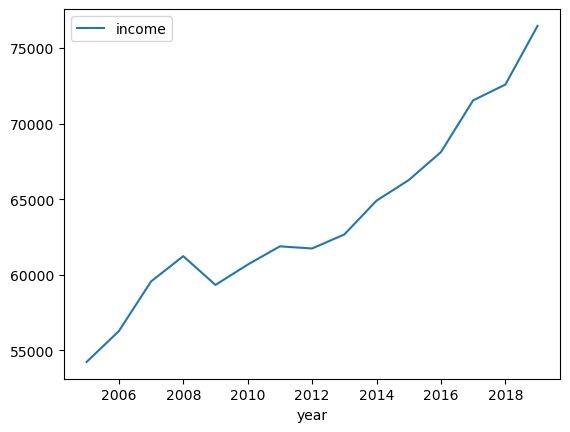

In [15]:
df.plot(x= 'year', y='income')

In [ ]:
cur.close()
conn.close()